# MIS 6900 - HW2 - Excel type things with Python

## Preliminaries

In [151]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import commonly used libraries and magic command for inline plotting

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [153]:
%matplotlib inline

Import the `whatif` module

In [154]:
from whatif import Model
from whatif import get_sim_results_df

## Analysis 1 - Basic Break-even Analysis

Problem description:

The owner of a relatively small business is trying to determine the breakeven level of sales of the company's single product. The fixed cost of manufacturing product each month is **\\$5,000**. The variable cost of producing this product is **\\$100** per unit. The current selling price is **\\$115**. Using historical data on selling price and monthly demand, the owner fit the folllowing function relating to demand and selling price:

$D = 0.06S^2 - 35S + 4900$

where *D* is the monthly demand for the product and *S* is the selling price. This is a 2nd order polynomial function. Let's call this equation the `Selling Price Function` (or `SPF`, for short).

### Base Model

In [155]:
class SingleProductSPF(Model):
    """Base model"""
    def __init__(self, fixed_cost = 5000, var_cost = 100, selling_price = 115, 
                 spf_constant = 4900, spf_linear = 35, spf_quadratic = 0.06):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic
    
    def demand(self):
        demand = (self.spf_quadratic * (self.selling_price ** 2)) - (self.spf_linear * self.selling_price) + (self.spf_constant)
        return demand
    
    def total_cost(self):
        total_cost = (self.demand() * self.var_cost) + self.fixed_cost
        return total_cost
    
    def total_revenue(self):
        total_revenue = self.demand() * self.selling_price
        return total_revenue
    
    def profit(self):
        profit = self.total_revenue() - self.total_cost()
        return profit
    

Instantiating an instance of our SPF model and confirming that we're getting the correct demand and profit value with default parameters

In [156]:
model = SingleProductSPF()
print(f"Single product SPF model demand with selling price set at ${model.selling_price:,.2f} is: ${model.demand():,.2f}")
print(f"Single product SPF model profit with selling price set at ${model.selling_price:,.2f} is: ${model.profit():,.2f}")
print(f"Single product SPF model attributes: {model}")

Single product SPF model demand with selling price set at $115.00 is: $1,668.50
Single product SPF model profit with selling price set at $115.00 is: $20,027.50
Single product SPF model attributes: {'fixed_cost': 5000, 'var_cost': 100, 'selling_price': 115, 'spf_constant': 4900, 'spf_linear': 35, 'spf_quadratic': 0.06}


### 1-Way Data Table

#### The data table

Creating a one-way data table using the inherited `data_table` function from Model (from the `whatif` package). We are using `selling_price` values from 80 to 140 (by steps of 10) as the input and outputting the `profit` and `demand`.

In [157]:
one_way_inputs = {'selling_price': np.arange(80, 141, 10)}
one_way_output = ['profit', 'demand']

one_way_df = model.data_table(one_way_inputs, one_way_output)
one_way_df

,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0


#### Visualizing the data table

Graphing our 1-way data table dataframe.

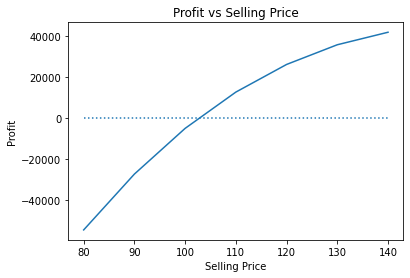

In [158]:
one_way_x = one_way_df['selling_price']
one_way_y = one_way_df['profit']

plt.xlabel('Selling Price')
plt.ylabel('Profit')

plt.hlines(y=0, xmin=min(one_way_df['selling_price']), xmax=max(one_way_df['selling_price']), linestyles='dotted')

plt.title('Profit vs Selling Price')

plt.plot(one_way_x, one_way_y)

plt.show()

#### Discussion & summary of the data table

The shape of the relationship between the selling price and profit looks like some degree polynomial. Profit does not increase linearly with selling price. We can see that as selling price increases, profit increases but at a decreasing rate. 

The result is that the "line" is curved, arching as selling price increases. It almost looks like 40%-45% of the left side of a rainbow.

In short, the relationship is nonlinear and this makes sense since our SPF (selling price function) is quadratic. Our SPF calculates the demand and demand is in turn used to calculate the profit. Not only is SPF quadratic, but it has a positive squared variable (0.06 * S ^ 2) and a negative linear variable (- 35 * S).

### Break-Even

Break-even selling price between \\$80 and \\$140.

In [159]:
print(f"Selling price (between $80 and $140) that gets us at the break-even point ($0) for profit: ${model.goal_seek('profit', 0, 'selling_price', 80, 140, 100):,.2f}")

Selling price (between $80 and $140) that gets us at the break-even point ($0) for profit: $102.58


### 2-Way Data Table

#### The data table

Let's create a 2-way data table using `selling_price` (\\$80 to \\$140, steps of \\$10), `var_cost` (\\$85 to \\$110, steps of \\$5) as the inputs and `profit` and `total_cost` as the outputs.

In [160]:
two_way_inputs = {'selling_price': np.arange(80, 141, 10),
                 'var_cost': np.arange(85, 111, 5)}
two_way_outputs = ['profit', 'total_cost']

two_way_df = model.data_table(two_way_inputs, two_way_outputs)
two_way_df

,selling_price,var_cost,profit,total_cost
0,80,85,-17420.0,216140.0
1,80,90,-29840.0,228560.0
2,80,95,-42260.0,240980.0
3,80,100,-54680.0,253400.0
4,80,105,-67100.0,265820.0
5,80,110,-79520.0,278240.0
6,90,85,6180.0,195060.0
7,90,90,-5000.0,206240.0
8,90,95,-16180.0,217420.0
9,90,100,-27360.0,228600.0


#### Visualizing the data table

Let's visualize how the selling price and variable cost affect the profit.

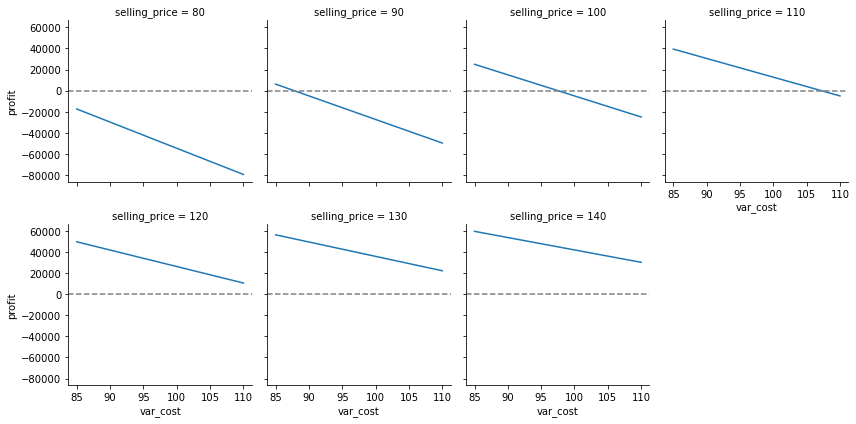

In [161]:
two_way_graph = sns.FacetGrid(two_way_df, col="selling_price", sharey=True, col_wrap=4)
two_way_graph = two_way_graph.map(plt.plot, "var_cost", "profit")
two_way_graph = two_way_graph.refline(y=0)

From this faceted plot, we can see that increasing the selling price increases the profit and that higher variable cost translates into less profit.

It's easy to see the negative linear relationship between variable cost (in this band) and profit since we have a downward sloped line. As for seeing how increasing selling price (at least in this band) increases the profits, we can see how the line (at each point) is higher going from 80 to 140 selling price in steps of 10 (notice the line is above the y=0 reference line).

### Digging Deeper

#### Redoing the goal seek

Redoing the Goal Seek but using \\$80-\\$250 instead

In [162]:
# Got an error from the below code so it's been commented out
# print(f"Selling price (between $80 and $140) that gets us at the break-even point ($0) for profit: ${model.goal_seek('profit', 0, 'selling_price', 80, 250, 2000):,.2f}")

print(model.goal_seek('profit', 0, 'selling_price', 80, 250, 100))
print(model.goal_seek('profit', 0, 'selling_price', 80, 250, 10000))

# Makes sense why we were getting that error now

None
None


Looks like our bisection algorithm cannot find a root for the equation using a selling price between 80 and 250. This is the case even when we increase the number of iterations to 10,000. We can refer to https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/bisection/ to get a better understanding (as seen in `whatif.py`).

![bisection algorithm error](./images/Bisection_algorithm_error.png)

From this explanation, we can deduce that we had "either ... a bad initial interval or rounding error in computations." We can also look at the docstrings for further explanation on our interval/bounds `a` (80) and `b` (250).

In [163]:
?model.goal_seek

Signature: model.goal_seek(obj_fn, target, by_changing, a, b, N=100)
Docstring:
Approximate solution of f(x)=0 on interval [a,b] by bisection method.

Parameters
----------
obj_fn : str
    The function name for which we are trying to approximate a solution f(x)=target.
target : float
    The goal
by_changing : str
    Name of the input variable in model
a,b : numbers
    The interval in which to search for a solution. The function returns
    None if (f(a) - target) * (f(b) - target) >= 0 since a solution is not guaranteed.
N : (positive) integer
    The number of iterations to implement.

Returns
-------
x_N : number
    The midpoint of the Nth interval computed by the bisection method. The
    initial interval [a_0,b_0] is given by [a,b]. If f(m_n) - target == 0 for some
    midpoint m_n = (a_n + b_n)/2, then the function returns this solution.
    If all signs of values f(a_n), f(b_n) and f(m_n) are the same at any
    iteration, the bisection method fails and return None.
File:   

#### Redoing the 1-way data table

Let's redo the 1-way data table as well to get further insight on why this is happening.

In [164]:
one_way_inputs_new = {'selling_price': np.arange(80, 251, 10)}
one_way_output_new = ['profit', 'demand']

one_way_df_new = model.data_table(one_way_inputs_new, one_way_output_new)
one_way_df_new

,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0
7,150,45000.0,1000.0
8,160,45160.0,836.0
9,170,42880.0,684.0


We have two sign changes in this data table (i.e. two roots): one occuring between a selling price of 100 and 110 and another one occuring between a selling price of 220 and 230. 

We start out with a negative profit for our first interval and end with a negative profit for our last interval which breaks the algorithm since f(a_n) * f(b_n) is greater than 0 for our first iteration which in this case is **-54,680** and **-20,000** (-54,680 profit for selling price of 80 and -20,000 profit for selling price of 250).

The line the bisection algorithm stops at is this one:
```python
        if (f_a_0 - target) * (f_b_0 - target) >= 0:
            # print("Bisection method fails.")
            return None
```

where `f_a_0` = -54,680, `f_b_0` = -20,000, and `target` = 0. 

Now it makes sense why `goal_seek`, in the way that it's currently implemented, failed to find a solution/root (i.e. `-54,680 * -20,000 >= 0` evaluates to `True` so `None` is returned)

### Simulation

In [165]:
from numpy.random import default_rng
rg = default_rng(100) # setting a seed for reproducibility


In [166]:
# lower bound of 80 and upper bound (exclusive) of 120, returning 1,000 results
var_cost_sim = rg.uniform(80, 120, 1000)
print(f"The mean of 'var_cost_sim', using 1,000 \"samples\"/iterations, is ${np.mean(var_cost_sim):,.2f} and the type of the 'var_cost_sim' object is {type(var_cost_sim)}")

The mean of 'var_cost_sim', using 1,000 "samples"/iterations, is $100.75 and the type of the 'var_cost_sim' object is <class 'numpy.ndarray'>


In [167]:
# getting our parameters for the `simulate` function ready
random_inputs = {'var_cost': var_cost_sim}
outputs = ['profit', 'demand']
scenario_inputs = None # {'selling_price': np.arange(80, 251, 10)}
keep_random_inputs = True

# calling the `simulate` function with our parameters
sim_results = model.simulate(random_inputs, outputs, scenario_inputs, keep_random_inputs)
print(f"Let's see what `sim_results` looks like: \n{sim_results}")

Let's see what `sim_results` looks like: 
[{'scenario_base_vals': {'fixed_cost': 5000, 'var_cost': array([113.39926522, 103.86216108,  91.55452967,  81.71806283,
       118.9461758 , 103.85886816, 111.61052658, 116.41357525,
       107.5261779 ,  87.59965894, 119.25915923,  91.389602  ,
       105.17092679, 103.24145915, 103.99649093, 101.40992421,
       119.83108417, 100.07784339, 110.84090306,  99.76647115,
       119.90697973, 119.14487685,  95.7427218 ,  92.87701051,
       114.48722604, 111.97299581, 107.65722531,  96.34071407,
        95.59060531,  85.26593582, 105.01989951,  83.29605482,
        90.98291955, 106.24468108,  80.58704121, 113.38128688,
        82.89596312, 100.96483293, 101.86202062,  89.08987851,
       118.23912865,  93.63855403, 100.18829763, 114.69534446,
       106.27811799,  95.38889631,  83.85089631, 118.23222495,
       103.58268536, 103.2865157 , 103.88581088,  85.95495733,
       102.40194514, 102.52670081, 103.2395274 ,  87.3979598 ,
       108.38475648

#### Histogram of profit

This is kind of hard to look at and understand, let's visualize `profit` with a histogram instead.

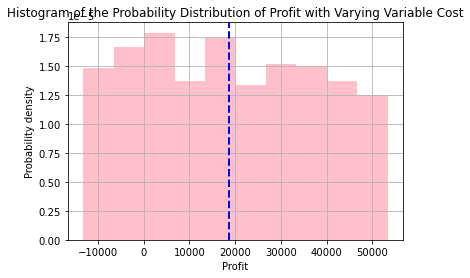

Overall mean of `profit` is: $18,783.14


In [168]:
# Storing the `profit` ndarrays for each scenario in a list
profit_sim = [scenario['output']['profit'] for scenario in sim_results]

# Storing a list of all the means of the profit scenarios
profit_sim_mean_list = [np.mean(profit_scenario) for profit_scenario in profit_sim]

# Storing the overall mean. this is okay to do since the size of the `output` arrays will always be the same. It might not be okay to do otherwise
profit_sim_mean = np.mean(profit_sim_mean_list)

# Creating our PyPlot histogram object and feeding it the `profit_sim` list of ndarrays consisting of `profit` outputs with varying `var_cost` values along with some optional parameters
# note: even with multiple scenarios, which would include multiple arrays in the list, PyPlot would be able to handle it
plt.hist(profit_sim, density=True, color='pink') 

# Title, x, and y label for clarity
plt.xlabel('Profit')
plt.ylabel('Probability density')
plt.title('Histogram of the Probability Distribution of Profit with Varying Variable Cost')

# Grid for clarity
plt.grid(True)

# Showing the mean via a vertical line
plt.axvline(profit_sim_mean, color='blue', linestyle='dashed', linewidth=2)

plt.show()

print(f"Overall mean of `profit` is: ${profit_sim_mean:,.2f}")

An alternative approach using the user-defined `get_sim_results_df` function within the `whatif` package (that I forgot about).

In [169]:
from whatif import get_sim_results_df

In [170]:
sim_results_df = get_sim_results_df(sim_results)
sim_results_df

,profit,demand,scenario_num
0,-2329.174020,1668.5,0
1,13583.484240,1668.5,0
2,34118.767250,1668.5,0
3,50530.912172,1668.5,0
4,-11584.194329,1668.5,0
...,...,...,...
995,52523.399501,1668.5,0
996,32689.759520,1668.5,0
997,-1991.513713,1668.5,0
998,51477.141270,1668.5,0


Same as before but with the dataframe columns. Let's actually change up the parameters a bit to see the bins cumulatively and let's put another horizontal line at `profit` = 0.

This will allow us to visualize the probability that profit is negative.

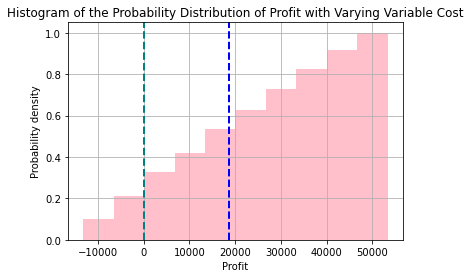

Overall mean of `profit` is: $18,783.14


In [171]:
# Creating our PyPlot histogram object and feeding it the `profit_sim` list of ndarrays consisting of `profit` outputs with varying `var_cost` values along with some optional parameters
# note: even with multiple scenarios, which would include multiple arrays in the list, PyPlot would be able to handle it
plt.hist(sim_results_df['profit'], density=True, color='pink', cumulative=True) 

# Title, x, and y label for clarity
plt.xlabel('Profit')
plt.ylabel('Probability density')
plt.title('Histogram of the Probability Distribution of Profit with Varying Variable Cost')

# Grid for clarity
plt.grid(True)

# Showing the mean and profit=0 via horizontal lines
plt.axvline(profit_sim_mean, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(0, color='teal', linestyle='dashed', linewidth=2)

plt.show()

print(f"Overall mean of `profit` is: ${profit_sim_mean:,.2f}")

#### Probability of negative profit

Since the bins in the histogram above are cumulative (the probability at a bin is the sum of that bin's probability plus the probability of the bins that came before it), we can see that `profit` has a 20% chance of being in the negatives (look at the bin to the left of the teal vertical line at profit = 0).

In [172]:
# to suppress showing the histogram inline
%matplotlib agg

sim_hist = plt.hist(sim_results_df['profit'], density=True, color='pink', cumulative=True)
sim_hist

(array([0.099, 0.21 , 0.329, 0.42 , 0.536, 0.625, 0.726, 0.826, 0.917,
        1.   ]),
 array([-13193.21759888,  -6537.19101429,    118.8355703 ,   6774.86215489,
         13430.88873947,  20086.91532406,  26742.94190865,  33398.96849324,
         40054.99507783,  46711.02166242,  53367.04824701]),
 <BarContainer object of 10 artists>)

The first array returned from `sim_hist` variable (which is a tuple) is the array of y-values corresponding to each bin. The second array are the edges of the bins. The last item is a BarContainer object. 

From this we can gauge the cumulative probability between the edges of the second and third item which correspond to the second bin (profit = 0 falls inside the second bin as seen from the sign change in the values of the array as well as visually in the histogram). The second bin has a probability of **0.21** (which will vary each the notebook is ran and random variates are generated again), so about 20% as we said before from eyeballing it.

In [173]:
# so we revert to the GUI backend instead of the non-GUI agg backend
%matplotlib inline

## Analysis 2 - Wrangling csv files

Let's import what we need first

In [174]:
import os
from glob import glob
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.worksheet import dimensions
from pathlib import Path

### Consolidation

Note: The csv files were manually copied to the `data` and `raw` directories, although more complicated or programmatic tasks would require the copying to be done through code as in the `using_python_with_excel` notebook by Professor Isken.

We are only working with the BCM stream, that was obvious from the homework. I did this in case I decided to create a more flexible approach to creating consolidated Excel files.

In [175]:
# Create an empty workbook 
bcm_wb = Workbook()

# Set destination path
dest_path = Path.cwd() / 'output' / 'BCM.xlsx' # Path.cwd() / 'data' / (stream_names[0] + '.xlsx')

# Save the workbook
bcm_wb.save(filename=dest_path)

# Inputs
csvs_path = Path.cwd() / 'data'

header_names = ['datetime', 'scale', 'temperature']

# Loop over all the csv files 
counter = 0
for csv_f in csvs_path.glob('*.csv'):
    # Split the filename off from csv extension. We'll use the filename
    # (without the extension) as the key in the dfs dict.
    fstem = csv_f.stem

    ws = bcm_wb.create_sheet(title=fstem, index=counter)
    counter += 1
    
    # Read the next csv file into a pandas DataFrame and add it to
    # the worksheet
    df = pd.read_csv(csv_f, names=header_names, parse_dates=['datetime'])
            
    # Append the dataframe to the worksheet
    for r in dataframe_to_rows(df, index=False, header=True):
        ws.append(r)
        
    # Add some styling to the headers
    for cell in ws['1']:
        cell.style = 'Pandas'
    
    bcm_wb.save(dest_path)
    
# will have to figure out a clean way of autofitting column width another time

### Summarization

In [176]:
from openpyxl import load_workbook

# load workbook
wb = load_workbook(filename=dest_path)

# loop over the worksheets of our previously saved workbook object
for ws in wb:
    # add new labels
    ws['G2'] = 'min_temp'
    ws['G3'] = 'max_temp'
    ws['G4'] = 'mean_temp'
    ws['G6'] = 'min_date'
    ws['G7'] = 'max_date'
    
    # get max row of the worksheet. There's probably a cleaner way of doing this by looking at the max row of the column, not the worksheet
    # this will work for now though as the max row will always be from column A (or B or C since they're equivalent) instead of G or H
    max_row = ws.max_row
    
    # add the formulas
    ws['H2'] = '=MIN(C2:C' + str(max_row) +  ')'
    ws['H3'] = '=MAX(C2:C' + str(max_row) +  ')'
    ws['H4'] = '=AVERAGE(C2:C' + str(max_row) +  ')'
    ws['H6'] = '=MIN(A2:A' + str(max_row) +  ')'
    ws['H7'] = '=MAX(A2:A' + str(max_row) +  ')'
            
    # reformat the cells for a uniform and cleaner presentation with only 1 decimal place
    ws['H2'].number_format = '0.0'
    ws['H3'].number_format = '0.0'
    ws['H4'].number_format = '0.0'
    ws['H6'].number_format = 'yyyy-mm-dd h:mm:ss'
    ws['H7'].number_format = 'yyyy-mm-dd h:mm:ss'
    
    # resize all our columns with data
    ws.column_dimensions['A'].bestFit = True
    ws.column_dimensions['B'].bestFit = True
    ws.column_dimensions['C'].bestFit = True
    ws.column_dimensions['G'].bestFit = True
    ws.column_dimensions['H'].bestFit = True
    
    # For some reason the columns that have datetime values are not getting the actual best fit
    # I think it has to do with how the values are stored as integers so bestFit might be fitting to that integer value
    # Adding a little extra padding to help
    ws.column_dimensions['A'].width = ws.column_dimensions['A'].width * 1.4
    ws.column_dimensions['H'].width = ws.column_dimensions['H'].width * 1.4
    
    # save the workbook object
    wb.save(dest_path)
    